In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Why SARIMA?
Seasonality: SARIMA effectively models time series data with seasonality, which is common in retail sales data due to patterns like increased sales during holidays or specific months.
Flexibility: It can accommodate the non-stationary nature of many time series datasets through differencing and seasonal differencing, which helps stabilize the mean of the time series.
Interpretability: The model parameters (p, d, q) and seasonal parameters (P, D, Q) provide insights into the trends and seasonality of the data.
Other models like ARIMA are also popular, but they don’t account for seasonality, which might be crucial for predicting sales. Advanced models like Prophet or LSTM neural networks offer greater flexibility and can model complex patterns but require more computational resources and can be overfitting-prone without careful tuning, making SARIMA a balanced choice

#EXPLAINATION
1. **Validation Split:**
   - The training data is divided into two parts: a training set and a validation set.
   - This split helps us test how well the model performs on unseen data.

2. **Model Training:**
   - We train the SARIMA model using only the training set.
   - This step teaches the model the patterns in the training data.

3. **Forecasting and Evaluation:**
   - The model makes predictions (forecasts) for the validation period.
   - We then compare these predictions with the actual values in the validation set.
   - We calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to measure the accuracy of the model's predictions.

4. **Final Forecast:**
   - The trained model is used to predict future sales for the test dataset period.
   - These predictions are based on what the model learned from the training data.

5. **Submission File:**
   - The forecasted sales values are saved in a specific format required for submission.
   - This file contains the predicted number of units sold for each item in the test dataset.

This step-by-step process ensures the model is both accurate and ready to make reliable predictions on new data.

##TASK1
In this task, you will work with dummy sales data of a well-known brand on Amazon. Your objective is to build a time series forecasting model that predicts the number of units sold for each item ID.


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [3]:
train_path = '/content/drive/My Drive/forecasting-unit-sales-vit-task-2/train.csv'
test_path = '/content/drive/My Drive/forecasting-unit-sales-vit-task-2/test.csv'
sample_path = '/content/drive/My Drive/forecasting-unit-sales-vit-task-2/sample_submission.csv'

In [4]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
sample_data = pd.read_csv(sample_path)

In [5]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
train_data.sort_values('date', inplace=True)

In [6]:
item_id = train_data['Item Id'].unique()[0]
train_item_data = train_data[train_data['Item Id'] == item_id]

In [7]:
daily_sales = train_item_data.groupby('date')['units'].sum().asfreq('D').fillna(0)

In [8]:
train_size = int(len(daily_sales) * 0.8)
train, val = daily_sales[:train_size], daily_sales[train_size:]

In [9]:
model = SARIMAX(daily_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
results = model.fit(disp=False)

In [10]:
forecast = results.forecast(steps=len(val))

In [11]:
mse = mean_squared_error(val, forecast)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 17.52925917202533
Root Mean Squared Error (RMSE): 4.186795812076979


In [12]:
forecast = results.forecast(steps=len(test_data))


In [17]:
submission = pd.DataFrame({'ID': test_data['ID'], 'TARGET': forecast.values})

In [18]:
# Save the submission file
submission.to_csv('/content/drive/My Drive/forecasting-unit-sales-vit-task-2/sample_submission.csv', index=False)

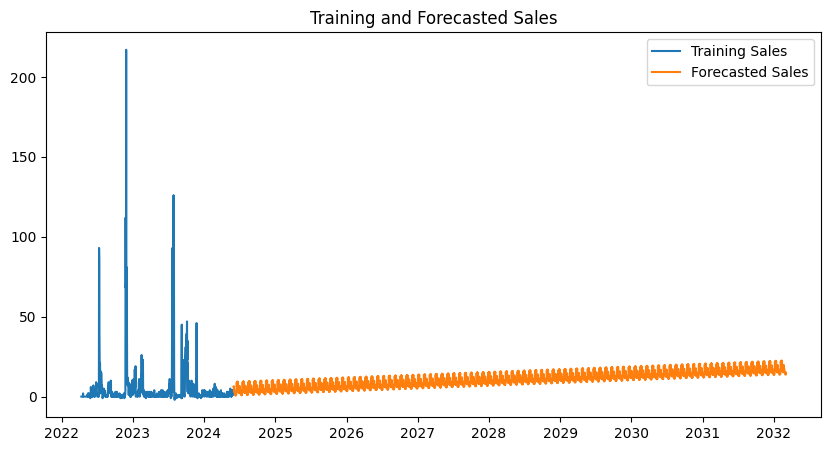

In [19]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales, label='Training Sales')
plt.plot(pd.date_range(daily_sales.index[-1], periods=len(forecast)+1, freq='D')[1:], forecast, label='Forecasted Sales')
plt.title('Training and Forecasted Sales')
plt.legend()
plt.show()